# Deutsch–Jozsa Algorithm

Deutsch–Jozsa generalizes Deutsch’s problem to $f:\{0,1\}^n \to \{0,1\}$ and decides, with a single oracle query, whether $f$ is **constant** (same output for all $2^n$ inputs) or **balanced** (outputs $0$ for exactly half of the inputs and $1$ for the other half). Classically, in the worst case you need $2^{n-1}+1$ queries; quantumly it takes $1$.

---

## Oracle

The oracle is a unitary $U_f$ acting on $(n+1)$ qubits:
$$
U_f\,|x\rangle|y\rangle \;=\; |x\rangle\,|y \oplus f(x)\rangle,
$$
with $x\in\{0,1\}^n$, $y\in\{0,1\}$ and $\oplus$ the XOR. Preparing the target in $|-\rangle=(|0\rangle-|1\rangle)/\sqrt{2}$ turns $U_f$ into a **phase oracle** on the $n$-qubit register:
$$
U_f\left(|x\rangle\otimes|-\rangle\right)=(-1)^{f(x)}\,|x\rangle\otimes|-\rangle.
$$

---

## Algorithm

1. **Initialize**
   $$
   |0\rangle^{\otimes n}\otimes|1\rangle.
   $$

2. **Hadamards**
   Apply $H$ to all $(n+1)$ qubits:
   $$
   H^{\otimes n}\otimes H:\quad
   |0\rangle^{\otimes n}\mapsto \frac{1}{\sqrt{2^n}}\sum_{x\in\{0,1\}^n}|x\rangle,\quad
   |1\rangle\mapsto |-\rangle.
   $$
   State becomes
   $$
   \frac{1}{\sqrt{2^n}}\sum_{x}|x\rangle\otimes|-\rangle.
   $$

3. **Oracle**
   Apply $U_f$:
   $$
   \frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}|x\rangle\otimes|-\rangle.
   $$

4. **Inverse Hadamards on the input register**
   Apply $H^{\otimes n}$ to the $n$-qubit register:
   $$
   H^{\otimes n}\left(\frac{1}{\sqrt{2^n}}\sum_{x}(-1)^{f(x)}|x\rangle\right)
   \;=\;
   \sum_{z\in\{0,1\}^n}\left(\frac{1}{2^n}\sum_{x}(-1)^{f(x)\oplus x\cdot z}\right)|z\rangle,
   $$
   where $x\cdot z=\bigoplus_{i=1}^n x_i z_i$ is the bitwise inner product mod 2.

5. **Measure the $n$ input qubits**

   - If $f$ is **constant**, then $(-1)^{f(x)}$ is the same for all $x$, the interference is perfectly constructive at $z=0^n$ and destructive elsewhere. **Outcome is always $0^n$.**
   - If $f$ is **balanced**, the positive and negative phases cancel at $z=0^n$ and probability at $0^n$ is $0$. **Outcome is always some $z\neq 0^n$.**

Decision rule: measure $0^n$ ⇒ **constant**, otherwise ⇒ **balanced**.

---

## Circuit Structure

- $n$ **input** qubits, $1$ **ancilla**.
- Prepare: $X$ on ancilla, then $H$ on all $(n+1)$ qubits.
- Apply **oracle block** $U_f$.
- Apply $H^{\otimes n}$ on inputs.
- Measure only the $n$ input qubits.

---

## Oracle Constructions (examples)

- **Constant-0**: do nothing (no gates touching the ancilla).
- **Constant-1**: apply $X$ to the ancilla (or any equivalent that flips the target regardless of $x$).
- **Balanced parity**: for $f(x)=x_1\oplus x_2\oplus\cdots\oplus x_n$, apply CNOTs from each input qubit $i$ to the ancilla.
- **General balanced**: synthesize $f$ into a reversible network (e.g., using CNOT/Toffoli) that flips the ancilla iff $f(x)=1$.

In all cases, with the ancilla prepared in $|-\rangle$, the oracle effectively applies the phase $(-1)^{f(x)}$ to $|x\rangle$.

---

## Complexity

- **Queries**: $1$ quantum query to $U_f$ versus $\Omega(2^{n-1})$ classical queries (worst case).
- **Gates**: dominated by the cost of implementing $U_f$; overhead outside the oracle is $O(n)$ Hadamards plus $n$ measurements.



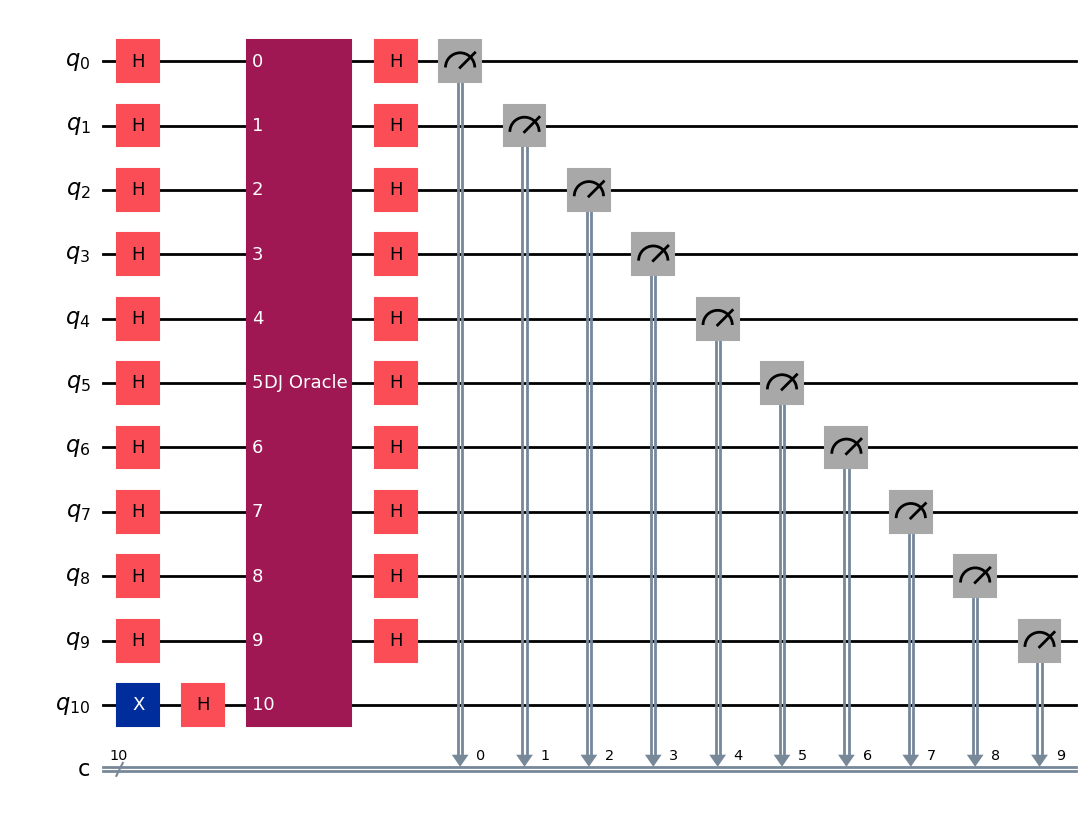

Counts: {'1111111111': 1024}


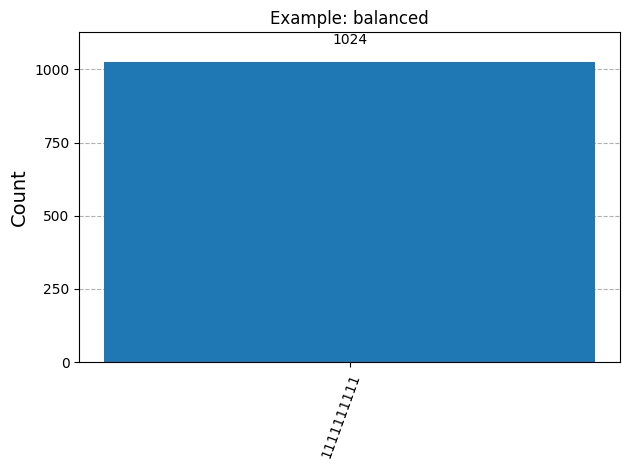

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Deutsch-Josa oracle generator
def deutsch_josa_oracle(case: str, n: int):
    qc = QuantumCircuit(n + 1, name="DJ Oracle")
    if case == "constant0":
        pass
    elif case == "constant1":
        qc.x(n)
    elif case == "balanced":
        for i in range(n):
            qc.cx(i, n)
    return qc

# Deutsch-Josa algorithm circuit
def deutsch_josa_algorithm(oracle):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n) # Initialize the ancilla qubit to |1>
    qc.h(list(range(n + 1))) # Apply Hadamard gates to all qubits
    qc.append(oracle, range(n + 1))  # Apply oracle
    qc.h(list(range(n))) # Apply Hadamard gates to all qubits
    qc.measure(range(n), range(n))
    return qc

# Example usage
n = 10  # Number of qubits
case = "balanced"  # Choose from 'constant0', 'constant1', or 'balanced'

oracle = deutsch_josa_oracle(case, n)
qc = deutsch_josa_algorithm(oracle)
display(qc.draw(output="mpl"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)

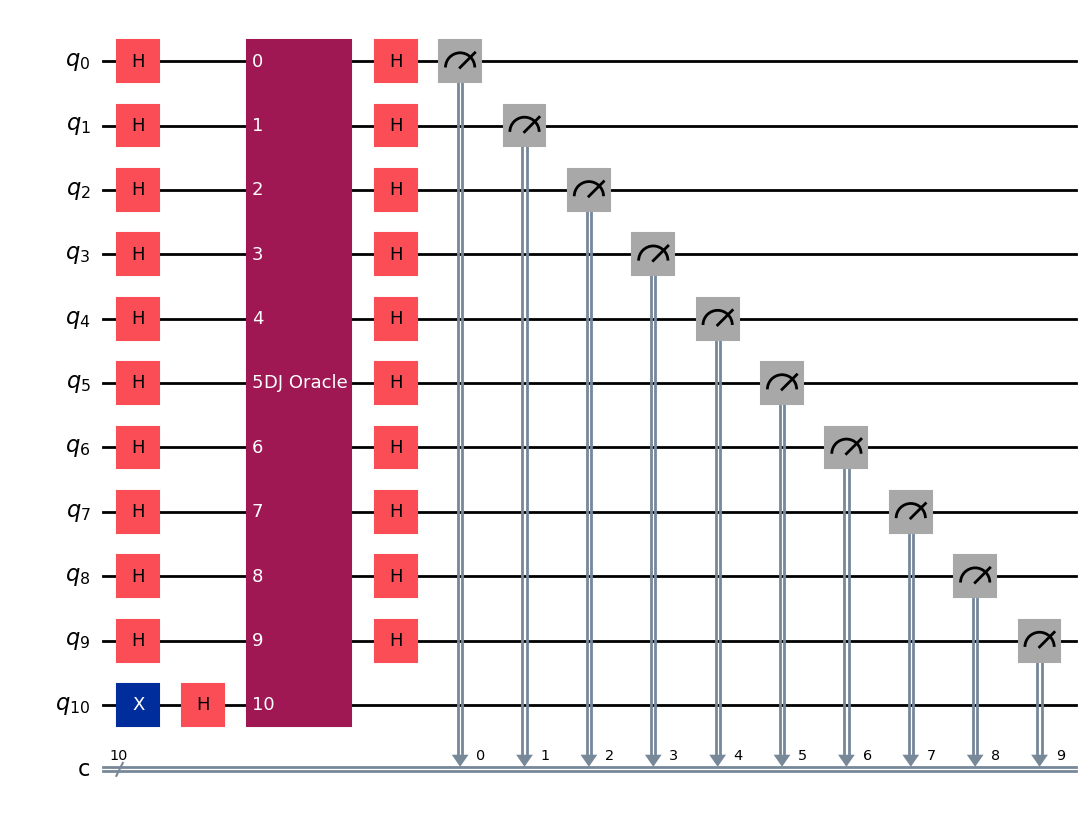

Counts: {'0000000000': 1024}


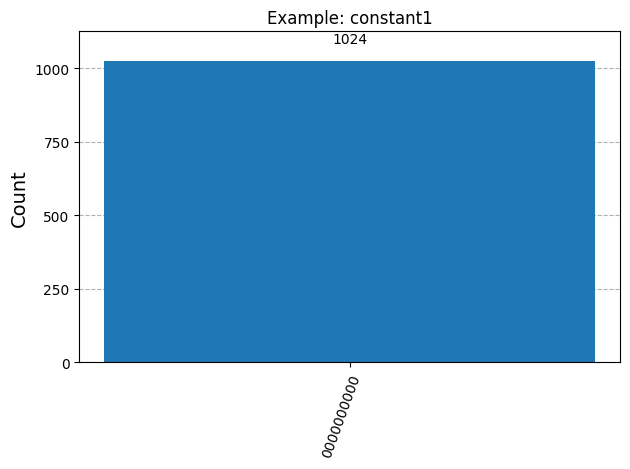

In [7]:
# Deutsch-Josa algorithm circuit
def deutsch_josa_algorithm(oracle):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n) # Initialize the ancilla qubit to |1>
    qc.h(list(range(n + 1))) # Apply Hadamard gates to all qubits
    qc.append(oracle, range(n + 1))  # Apply oracle
    qc.h(list(range(n))) # Apply Hadamard gates to all qubits
    qc.measure(range(n), range(n))
    return qc

# Example usage
n = 10  # Number of qubits
case = "constant1"  # Choose from 'constant0', 'constant1', or 'balanced'

oracle = deutsch_josa_oracle(case, n)
qc = deutsch_josa_algorithm(oracle)
display(qc.draw(output="mpl"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)

As expected, using Deutsch's algorithm we get all 1 if the function is balanced and all 0 if the function is constant.